In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
y = data.target

In [7]:
data = pd.DataFrame(X, columns=[data.feature_names])
data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
5,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,0.07613,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
6,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,0.05742,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
7,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,0.07451,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
8,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,0.07389,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,0.08243,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750


In [11]:
radius = X[:, 0].reshape(-1,1)
y = (y==0).astype(np.int)

model1=LogisticRegression()
model1.fit(radius, y)
y_pred = model1.predict(radius)
y_score = model1.decision_function(radius)

In [12]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_predict

# 지표 확인
print(confusion_matrix(y, y_pred)) # TP FN FP TN
display(accuracy_score(y, y_pred), precision_score(y, y_pred), recall_score(y, y_pred), f1_score(y, y_pred))
print(classification_report(y, y_pred))

[[158  54]
 [ 11 346]]


0.8857644991212654

0.865

0.969187675070028

0.9141347424042273

             precision    recall  f1-score   support

          0       0.93      0.75      0.83       212
          1       0.86      0.97      0.91       357

avg / total       0.89      0.89      0.88       569



In [13]:
texture = X[:, 1].reshape(-1,1)

model2=LogisticRegression()
model2.fit(texture, y)
y_pred = model2.predict(texture)
y_score = model2.decision_function(texture)
print(confusion_matrix(y, y_pred)) # TP FN FP TN
display(accuracy_score(y, y_pred), precision_score(y, y_pred), recall_score(y, y_pred), f1_score(y, y_pred))
print(classification_report(y, y_pred))

[[ 79 133]
 [ 42 315]]


0.6924428822495606

0.703125

0.8823529411764706

0.7826086956521738

             precision    recall  f1-score   support

          0       0.65      0.37      0.47       212
          1       0.70      0.88      0.78       357

avg / total       0.68      0.69      0.67       569



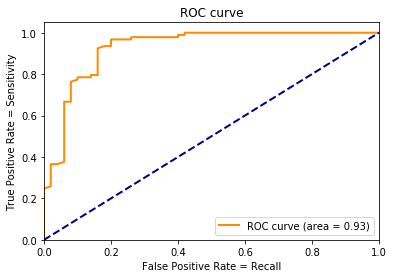

In [26]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(radius, y)
y_score = model1.fit(X_train, y_train).decision_function(X_test)
roc_auc = roc_auc_score(y_test, y_score)
fpr, tpr, thresholds = roc_curve(y_test, y_score)

plt.figure()
plt.plot(fpr, tpr, lw=2, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate = Recall')
plt.ylabel('True Positive Rate = Sensitivity')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

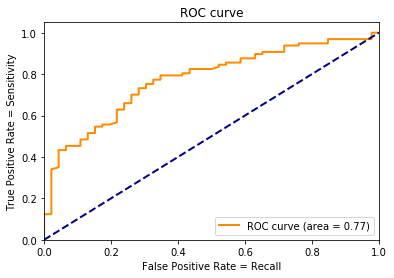

In [29]:
X_train, X_test, y_train, y_test = train_test_split(texture, y)
y_score = model2.fit(X_train, y_train).decision_function(X_test)
roc_auc = roc_auc_score(y_test, y_score)
fpr, tpr, thresholds = roc_curve(y_test, y_score)

plt.figure()
plt.plot(fpr, tpr, lw=2, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate = Recall')
plt.ylabel('True Positive Rate = Sensitivity')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [39]:
##model 1 is better
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1','l2']}

from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(model1, param_grid, cv=5)
grid_search.fit(radius, y)
print('최적의 파라미터: ', grid_search.best_params_)
print('최고 성능 모델: ', grid_search.best_estimator_)
print('최고 교차검증 점수: {:.2f}'.format(grid_search.best_score_))

최적의 파라미터:  {'C': 1, 'penalty': 'l2'}
최고 성능 모델:  LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
최고 교차검증 점수: 0.89


In [40]:
pd.set_option('display.max_columns', None)
results = pd.DataFrame(grid_search.cv_results_)
# 처음 다섯 개 행 출력
display(np.transpose(results.head()))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\de

,0,1,2,3,4
mean_fit_time,0.00139713,0.00198698,0.00119123,0.00178685,0.00897775
std_fit_time,0.00048813,1.51706e-05,0.000403532,0.000743494,0.000629774
mean_score_time,0.000598001,0.000398636,0.000798464,0.000400162,0.000997066
std_score_time,0.000488266,0.000488227,0.000399233,0.0004901,3.74552e-06
param_C,0.001,0.001,0.01,0.01,0.1
param_penalty,l1,l2,l1,l2,l1
params,"{'C': 0.001, 'penalty': 'l1'}","{'C': 0.001, 'penalty': 'l2'}","{'C': 0.01, 'penalty': 'l1'}","{'C': 0.01, 'penalty': 'l2'}","{'C': 0.1, 'penalty': 'l1'}"
split0_test_score,0.373913,0.626087,0.626087,0.626087,0.817391
split1_test_score,0.373913,0.626087,0.626087,0.634783,0.852174
split2_test_score,0.371681,0.628319,0.628319,0.646018,0.884956


In [41]:

y_pred = grid_search.predict(radius)
y_score = grid_search.decision_function(radius)
print(confusion_matrix(y, y_pred)) # TP FN FP TN
display(accuracy_score(y, y_pred), precision_score(y, y_pred), recall_score(y, y_pred), f1_score(y, y_pred))
print(classification_report(y, y_pred))

[[158  54]
 [ 11 346]]


0.8857644991212654

0.865

0.969187675070028

0.9141347424042273

             precision    recall  f1-score   support

          0       0.93      0.75      0.83       212
          1       0.86      0.97      0.91       357

avg / total       0.89      0.89      0.88       569

